# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.7.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
                                   horizontal_flip = False)
training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5655 images belonging to 45 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1439 images belonging to 45 classes.


<BarContainer object of 45 artists>

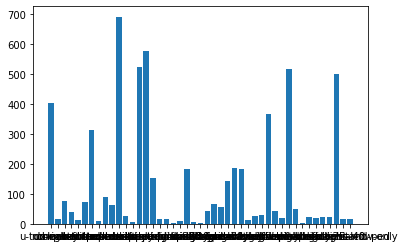

In [8]:
import os
import matplotlib.pyplot as plt
train_data_dict={}
test_data_dict={}
for i in os.listdir('dataset/train/'):
    if not i.startswith('.'):
        train_data_dict[i]=len(os.listdir('dataset/train/'+i))
    
for i in os.listdir('dataset/test/'):
    if not i.startswith('.'):
        test_data_dict[i]=len(os.listdir('dataset/test/'+i))
plt.tight_layout()
plt.bar(list(train_data_dict.keys()),list(train_data_dict.values()))  


## Part 2 - Building the CNN

### Initialising the CNN

In [9]:
cnn = tf.keras.models.Sequential()

### Convolution Layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding second Convolution Layer

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding third convolutional layer

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Flattening

In [13]:
cnn.add(tf.keras.layers.Flatten())

### Full Connection

In [14]:
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Dropout

In [15]:
cnn.add(tf.keras.layers.Dropout(0.2))

### Output Layer

In [16]:
cnn.add(tf.keras.layers.Dense(units=45, activation='softmax'))

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

## Part 3 - Training the CNN

### Compiling the CNN

In [18]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [19]:
conv = cnn.fit(x = training_set,batch_size=128, validation_data = test_set, epochs = 20)

Epoch 1/20
177/177 [==============================] - 84s 473ms/step - loss: 1.0470 - accuracy: 0.7447 - val_loss: 0.2458 - val_accuracy: 0.9423
Epoch 2/20
177/177 [==============================] - 89s 503ms/step - loss: 0.1861 - accuracy: 0.9503 - val_loss: 0.1601 - val_accuracy: 0.9583
Epoch 3/20
177/177 [==============================] - 81s 459ms/step - loss: 0.0737 - accuracy: 0.9784 - val_loss: 0.1418 - val_accuracy: 0.9736
Epoch 4/20
177/177 [==============================] - 87s 490ms/step - loss: 0.0378 - accuracy: 0.9890 - val_loss: 0.1072 - val_accuracy: 0.9757
Epoch 5/20
177/177 [==============================] - 85s 478ms/step - loss: 0.0403 - accuracy: 0.9890 - val_loss: 0.1187 - val_accuracy: 0.9743
Epoch 6/20
177/177 [==============================] - 83s 469ms/step - loss: 0.0387 - accuracy: 0.9899 - val_loss: 0.1233 - val_accuracy: 0.9736
Epoch 7/20
177/177 [==============================] - 92s 517ms/step - loss: 0.0190 - accuracy: 0.9961 - val_loss: 0.1121 - val_ac

## Model Accuracy and Loss

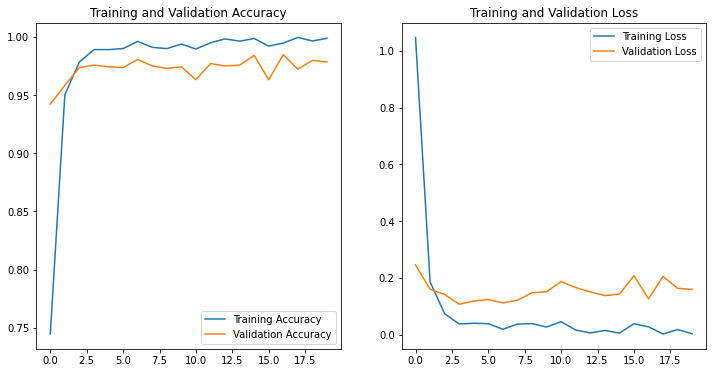

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(conv.history)
df.to_csv('cnn_model_accuracy.csv', header=True, index=False)
acc = [df['accuracy'], df['val_accuracy']]
loss = [df['loss'], df['val_loss']]

epoch = range(20)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, acc[0], label='Training Accuracy')
plt.plot(epoch, acc[1], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epoch, loss[0], label='Training Loss')
plt.plot(epoch, loss[1], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Part 4 - Making a single prediction

In [23]:
new_dict = dict([(value, key) for key, value in training_set.class_indices.items()])
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('frame9055.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
for i,j in enumerate(result[0]):
    if(j==1.0):
        print("The object is: ",new_dict[i])

The object is:  stop


## Saving model to file

In [24]:
import json
model_json = cnn.to_json()
with open("roadsigns1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn.save_weights("roadsigns1.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
## Loading model from file

In [ ]:
# from keras.models import model_from_json
# json_file = open('roadsigns.json', 'r')
# rs = json_file.read()
# json_file.close()
# loaded_model = model_from_json(rs)
# # load weights into new model
# loaded_model.load_weights("roadsigns.h5")
# print("Loaded model from disk")
 